# Tiktok DS project

#### Email from Rosie Mae Bradshaw, TikTok’s Data Analysis Manager

Subject: Welcome to the TikTok data team

From: Rosie Mae Bradshaw@TikTok

Welcome to the TikTok data team! We are so glad to have you aboard.

I’d like to get you started on our latest project. I’ll provide a little background that will give some context.With the number of submissions and interactions on TikTok each day, it’s challenging for our moderators to review each video, user comment, and content claim in a timely manner. You will assist us with the development of machine learning techniques that will assist in distinguishing between claims or opinions within content on the TikTok platform. The goal is to build a machine learning model with the capability to reliably classify user interaction data as a claim or opinion.

For your first task, please draft a plan of action for the team. Include questions we need to answer before we get started on the project, important details to consider at the beginning of the project, and the milestones we'll likely need throughout the duration of the project. To help get you started, I’ll pass along some bullet points I’ve collected from stakeholders in an email.

I recall from your interview that you’ve completed a Google Careers Certificate on Advanced Data Analytics. I’ve heard great things about the Google certificates. I'm sure that you’ll be able to use those skills to help get this latest project started.

If you need anything as you are settling in, feel free to reach out.

Rosie Mae Bradshaw

Data Analysis Manager

TikTok



### Objective
to predict whether a vedio represents a "claim" or an "opinion"

## Load data and EDA

In [1]:
import pandas as pd
import numpy as np

# For data visualization
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.offline as po
import plotly.graph_objs as go

In [95]:
#NLP
import nltk
nltk.download('punkt')  # Download necessary datasets
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

[nltk_data] Downloading package punkt to /Users/rufen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rufen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('/Users/rufen/Downloads/tiktok_dataset.csv')
data.head(20)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [3]:
data.shape

(19382, 12)

In [4]:
# drop irrelevent columns
data = data.drop(columns=['#','video_id'], axis =1)
data.shape

(19382, 10)

In [5]:
data.dtypes

claim_status                 object
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [6]:
# sns.barplot(data=data.isna().mean(), color = '#555555')
# plt.title('Null value distribution')
# plt.show()
data.isna().mean()

claim_status                0.015375
video_duration_sec          0.000000
video_transcription_text    0.015375
verified_status             0.000000
author_ban_status           0.000000
video_view_count            0.015375
video_like_count            0.015375
video_share_count           0.015375
video_download_count        0.015375
video_comment_count         0.015375
dtype: float64

In [7]:
column = ['claim_status','verified_status','author_ban_status']

for col in column:
    print('{} has data distibution:\n {}'.format(col, data[col].value_counts()))

claim_status has data distibution:
 claim      9608
opinion    9476
Name: claim_status, dtype: int64
verified_status has data distibution:
 not verified    18142
verified         1240
Name: verified_status, dtype: int64
author_ban_status has data distibution:
 active          15663
under review     2080
banned           1639
Name: author_ban_status, dtype: int64


In [8]:
data['video_transcription_text'].nunique()

19012

In [9]:
num_col = data.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['video_duration_sec', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count'],
      dtype='object')

#### Set target column

In [10]:
data['claim']=data['claim_status'].apply(lambda x : 1 if x =='claim' else 0)
data['claim'].value_counts()

0    9774
1    9608
Name: claim, dtype: int64

In [11]:
data = data.drop(columns= 'claim_status', index = 1)
print(data.shape)

(19381, 10)


#### Remove duplicates 

In [12]:
print("Before drop duplicates:", data.shape)
data.drop_duplicates(inplace=True)
print("After drop duplicates:", data.shape)

Before drop duplicates: (19381, 10)
After drop duplicates: (19181, 10)


### EDA

In [13]:
color = ('#E6BF45', "#555555")

In [14]:
data.head(5)

,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim
0,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,1
2,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,1
3,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,1
4,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,1
5,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0,1


Text(0.5, 1.0, 'The distribution of claim')

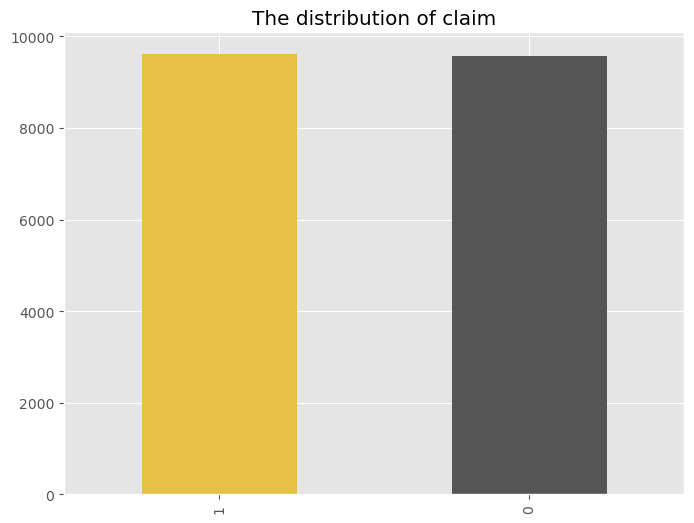

In [15]:
plt.figure(figsize=(8,6))
data['claim'].value_counts().plot(kind = 'bar', color = color)
plt.title('The distribution of claim')

Text(0.5, 1.0, 'The claim rate for verified_status')

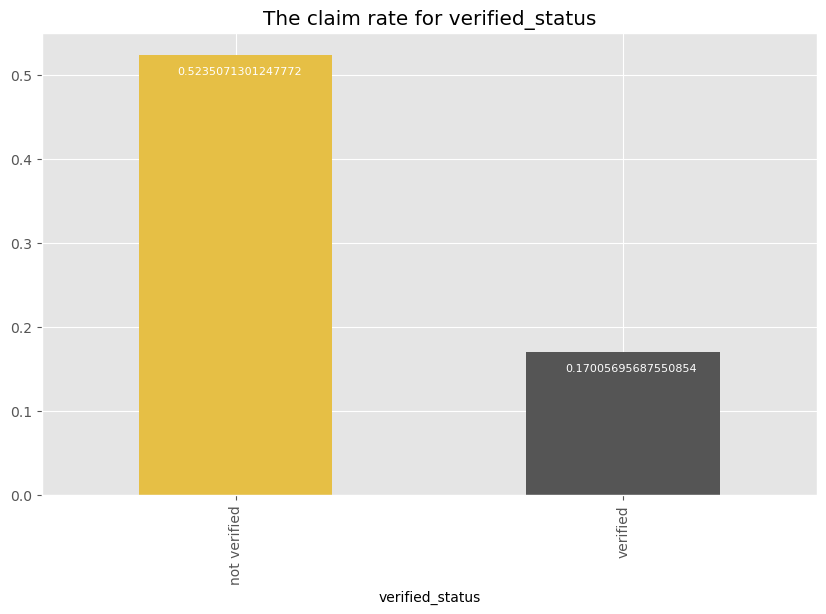

In [16]:
plt.figure(figsize=(10,6))
ax = data.groupby('verified_status')['claim'].mean().plot(kind = 'bar', color = color)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.1, p.get_height()), ha='left',va='top',color='w',size=8)
plt.title("The claim rate for verified_status")

Text(0.5, 1.0, 'The claim rate for author_ban_status')

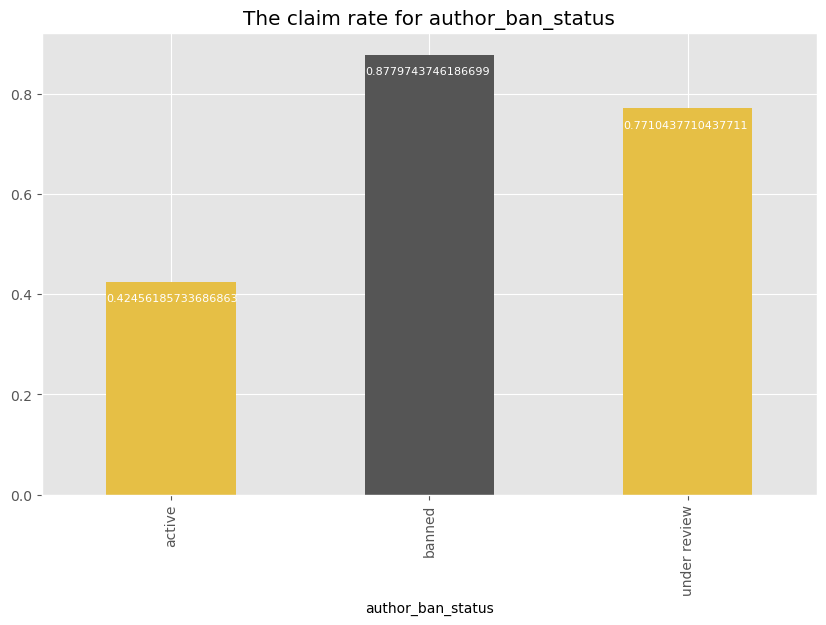

In [17]:
plt.figure(figsize=(10,6))
ax = data.groupby('author_ban_status')['claim'].mean().plot(kind = 'bar', color = color)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x(), p.get_height()), ha='left',va='top',color='w',size=8)
plt.title("The claim rate for author_ban_status")

#### We can see from teh EDA, that the not_verified status has higher claim_rate than verified status. For ban_status, the banned category has the highest claim rate, then is under review.

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_32289/3471538600.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'correlation among numeric columns')

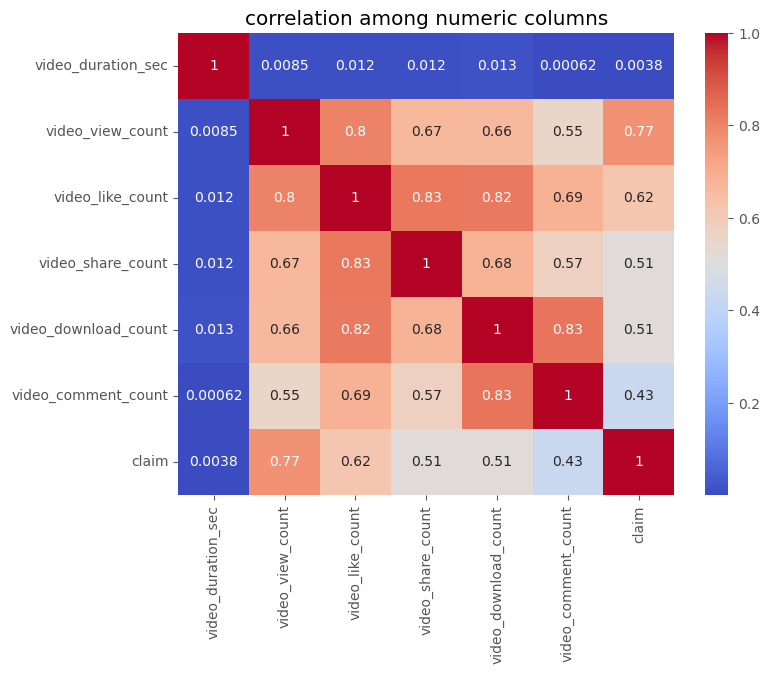

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("correlation among numeric columns")

#### We see from the correlation map that view, like, share, download and comment are highly correlated, we need to find the most relevaent features

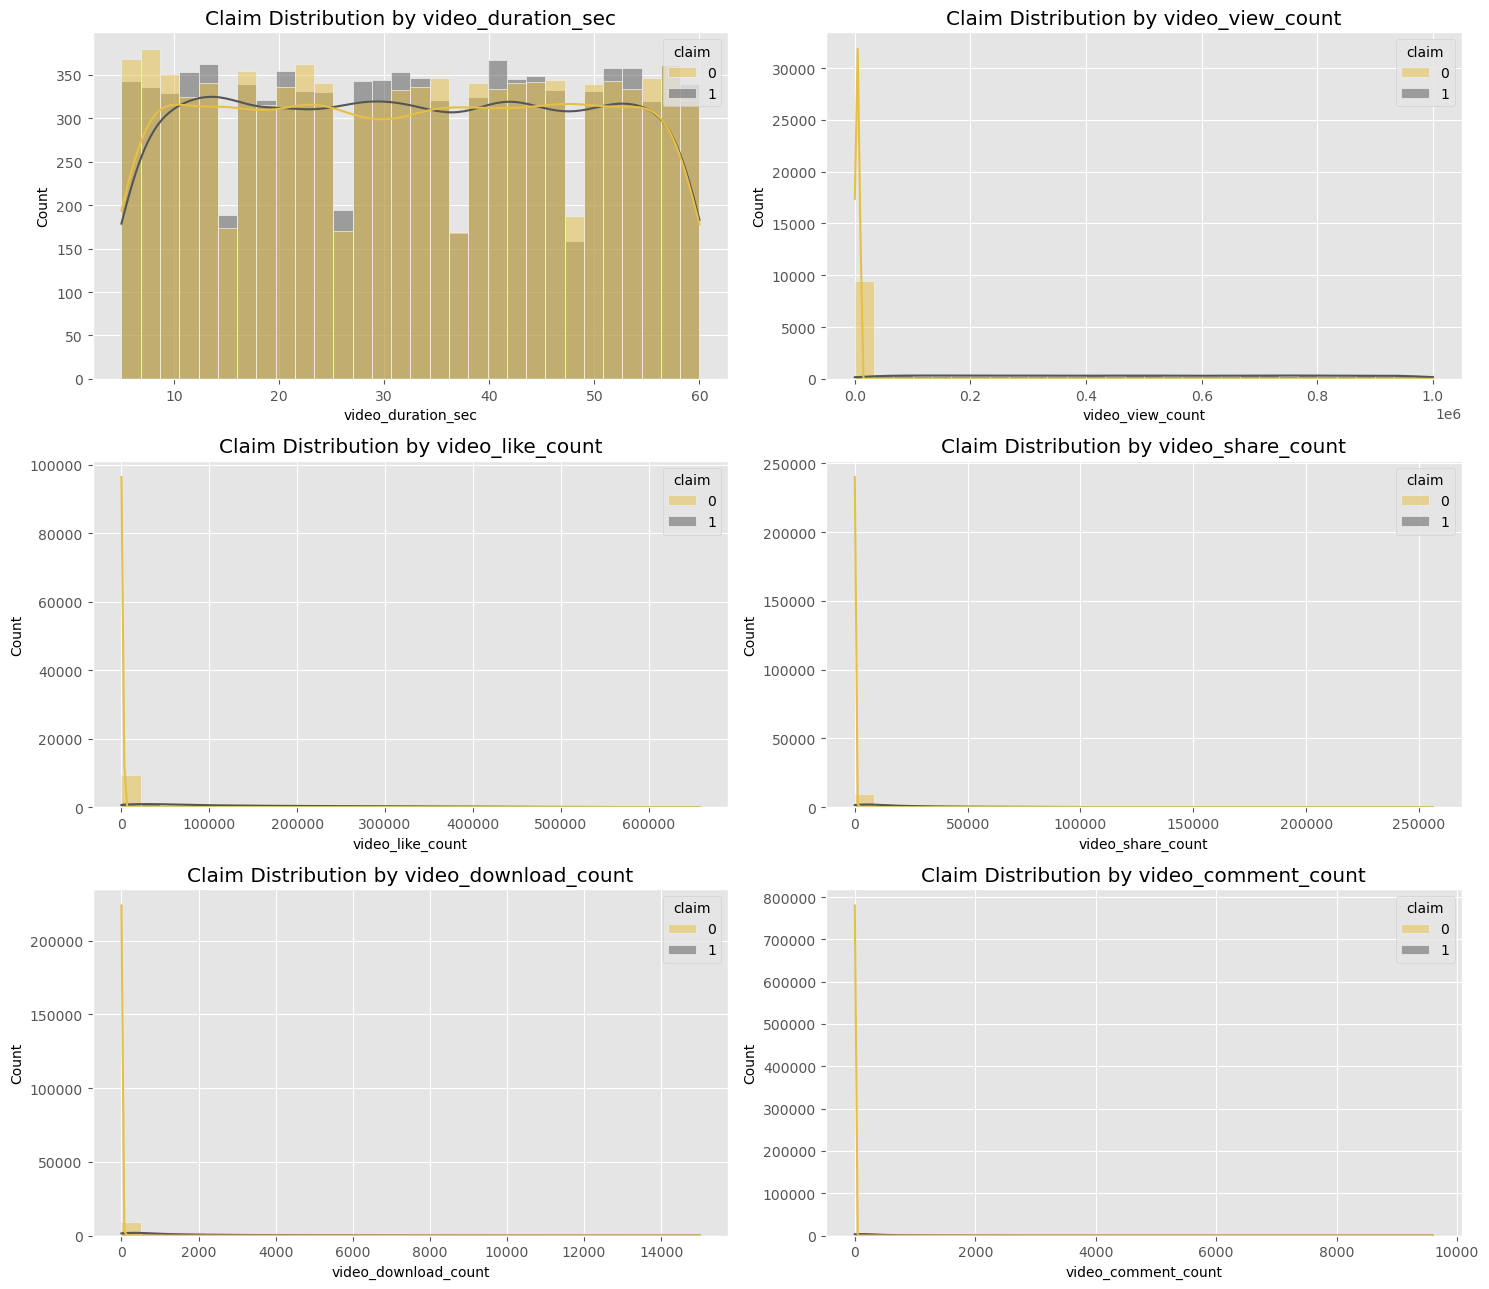

In [19]:
col1 = num_col.columns

plt.figure(figsize=(15, 13))

for i, col in enumerate(col1, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=data, x=col, hue='claim', bins=30, kde=True, palette=color)
    plt.title('Claim Distribution by {}'.format(col))
    plt.xlabel(col)  # Add x-axis label if needed

plt.tight_layout()  # Adjust the layout for better spacing between subplots
plt.show()

In [20]:
for col in col1:
    zero_value = (data[data[col]== 0]).shape[0]
    print(f'{col} has {zero_value} rows have value zero')

video_duration_sec has 0 rows have value zero
video_view_count has 0 rows have value zero
video_like_count has 4 rows have value zero
video_share_count has 99 rows have value zero
video_download_count has 977 rows have value zero
video_comment_count has 3434 rows have value zero


In [21]:
def cfratio(data,feature):
    percent = data.groupby(feature)['claim'].mean()
    return percent

In [22]:
def group(var, bins):
    group = pd.qcut(data[var],bins,duplicates='drop')
    return group

In [23]:
num_col.columns

Index(['video_duration_sec', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count'],
      dtype='object')

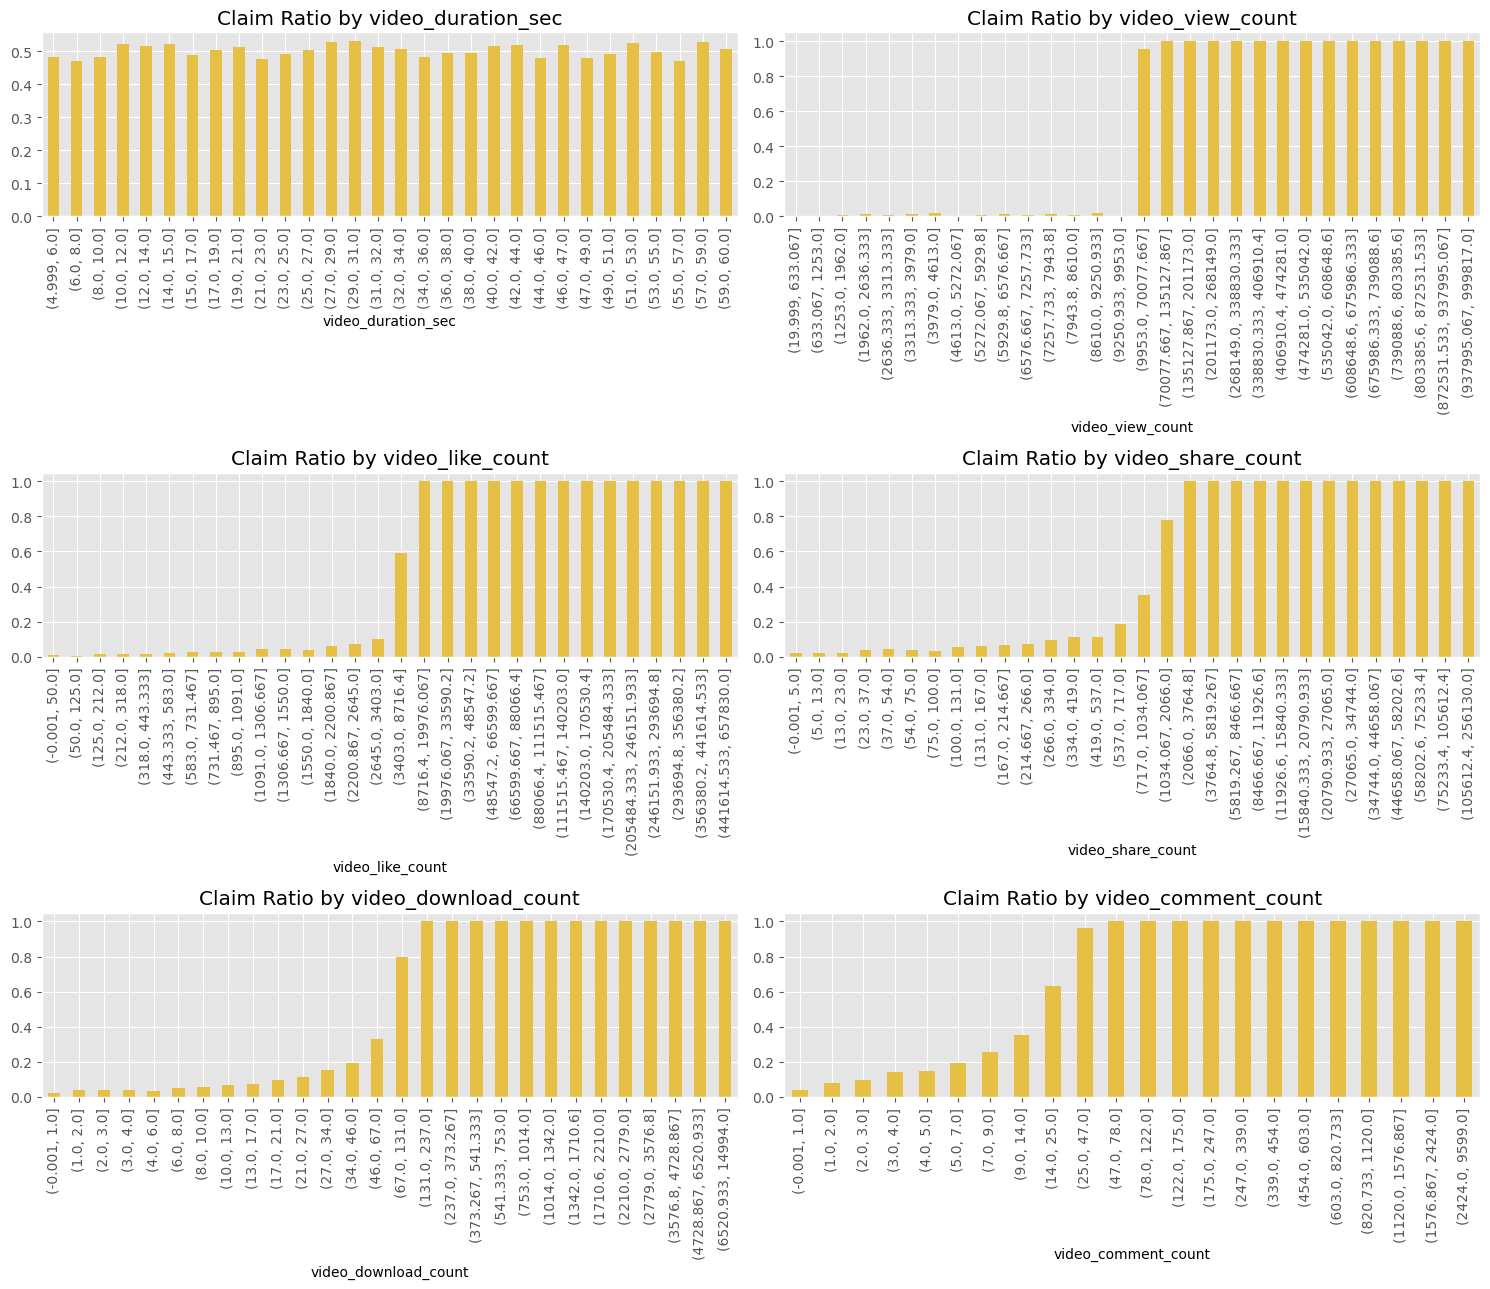

In [24]:
plt.figure(figsize=(15, 13))

for i, col in enumerate(col1, 1):
    plt.subplot(3, 2, i)
    cfratio(data,group(col,30)).plot(kind='bar', color='#E6BF45')
    plt.title('Claim Ratio by {}'.format(col))
    plt.xlabel(col)  # Add x-axis label if needed

plt.tight_layout()  # Adjust the layout for better spacing between subplots
plt.show()

#### We can see the trend that as the x_count increase, the claim rat eincreases

In [25]:
data['video_transcription_text'].head()

0    someone shared with me that drone deliveries a...
2    someone shared with me that american industria...
3    someone shared with me that the metro of st. p...
4    someone shared with me that the number of busi...
5    someone shared with me that gross domestic pro...
Name: video_transcription_text, dtype: object

In [26]:
#EDA on video_transcription_text
data['text_len']=data['video_transcription_text'].str.len()
data['text_len'].head()

0     97.0
2    137.0
3    131.0
4    128.0
5    127.0
Name: text_len, dtype: float64

In [27]:
data.groupby('claim')['text_len'].mean()

claim
0    82.722562
1    95.375768
Name: text_len, dtype: float64

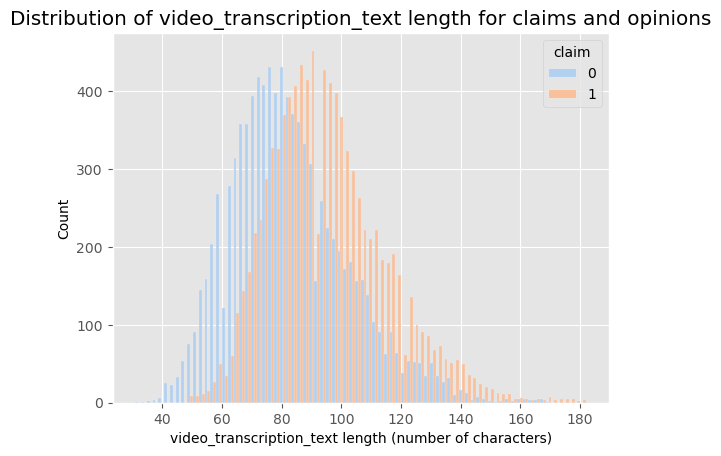

In [28]:
sns.histplot(data=data, stat="count", multiple="dodge", x="text_len",
             kde=False, palette="pastel", hue="claim",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

## Feature engineering

In [29]:
#missing value 
data.isna().mean()

video_duration_sec          0.000000
video_transcription_text    0.005109
verified_status             0.000000
author_ban_status           0.000000
video_view_count            0.005109
video_like_count            0.005109
video_share_count           0.005109
video_download_count        0.005109
video_comment_count         0.005109
claim                       0.000000
text_len                    0.005109
dtype: float64

In [30]:
df = data.dropna()
print(df.isna().mean())
print(df.shape)
print(df['claim'].value_counts(normalize = True))

video_duration_sec          0.0
video_transcription_text    0.0
verified_status             0.0
author_ban_status           0.0
video_view_count            0.0
video_like_count            0.0
video_share_count           0.0
video_download_count        0.0
video_comment_count         0.0
claim                       0.0
text_len                    0.0
dtype: float64
(19083, 11)
1    0.503432
0    0.496568
Name: claim, dtype: float64


In [31]:
#numeric all the categorial columns 
df = pd.get_dummies(df,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
df.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim,text_len,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,1,97.0,0,0,1
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,1,137.0,0,0,0
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,1,131.0,0,0,0
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,1,128.0,0,0,0
5,35,someone shared with me that gross domestic pro...,336647.0,175546.0,62303.0,4293.0,1857.0,1,127.0,0,0,1


In [32]:
df.shape

(19083, 12)

In [33]:
# remove outliners 
def remove_outlier(df,col):
    mean = df[col].mean()
    std = df[col].std()
    return df[np.abs(df[col]-mean) <= (3*std)]

removel = num_col

for col in removel:
    df = remove_outlier(df,col)
    print(f'After remove outliers from {col}, we have {df.shape[0]} rows left.')

After remove outliers from video_duration_sec, we have 19083 rows left.
After remove outliers from video_view_count, we have 19083 rows left.
After remove outliers from video_like_count, we have 18686 rows left.
After remove outliers from video_share_count, we have 18153 rows left.
After remove outliers from video_download_count, we have 17641 rows left.
After remove outliers from video_comment_count, we have 17100 rows left.


In [34]:
# double check if the target data are balanced 
print(df['claim'].value_counts(normalize = True))

0    0.554152
1    0.445848
Name: claim, dtype: float64


#### The target data is still balanced 

### NLP part with video_transcription_text

In [35]:
df['video_transcription_text']

0        someone shared with me that drone deliveries a...
2        someone shared with me that american industria...
3        someone shared with me that the metro of st. p...
4        someone shared with me that the number of busi...
7        someone shared with me that the best selling s...
                               ...                        
19079    in our opinion the earth holds about 11 quinti...
19080    in our opinion the queens in ant colonies live...
19081    in our opinion the moon is moving away from th...
19082    in our opinion lightning strikes somewhere on ...
19083    in our opinion a pineapple plant can only prod...
Name: video_transcription_text, Length: 17100, dtype: object

In [36]:
#lowercase, remove numbers, punctuations, whitespace,non-ascii,html
import string 

df['video_transcription_text'] = df['video_transcription_text'].str.lower()
df['video_transcription_text']= df['video_transcription_text'].astype(str).str.replace(r"\d+", " ")
df['video_transcription_text']= df['video_transcription_text'].str.replace("[{}]".format(string.punctuation), " ")
df['video_transcription_text']=df['video_transcription_text'].str.strip()
df['video_transcription_text'] = df['video_transcription_text'].apply(lambda x: x.encode("ascii", errors="ignore").decode())
df['video_transcription_text']=df['video_transcription_text'].str.replace(r"<[^<>]*>", "", regex=True)

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_32289/1216468033.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_32289/1216468033.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.



In [37]:
df['video_transcription_text'].head(5)

0    someone shared with me that drone deliveries a...
2    someone shared with me that american industria...
3    someone shared with me that the metro of st  p...
4    someone shared with me that the number of busi...
7    someone shared with me that the best selling s...
Name: video_transcription_text, dtype: object

In [38]:
#word tokenization
import nltk
nltk.download('punkt')  # Download necessary datasets
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

df['text_token']= df['video_transcription_text'].apply(word_tokenize)

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [39]:
df['text_token'].head()

0    [someone, shared, with, me, that, drone, deliv...
2    [someone, shared, with, me, that, american, in...
3    [someone, shared, with, me, that, the, metro, ...
4    [someone, shared, with, me, that, the, number,...
7    [someone, shared, with, me, that, the, best, s...
Name: text_token, dtype: object

In [43]:
# remove stopwords
stop_words = set(stopwords.words("english"))
df['text_token'] = df['text_token'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
df['text_token'].head(2)

0    [someone, shared, drone, deliveries, already, ...
2    [someone, shared, american, industrialist, and...
Name: text_token, dtype: object

In [44]:
# rejoin
df['video_transcription_text'] = df['text_token'].str.join(" ")
df['video_transcription_text'].head(2)

0    someone shared drone deliveries already happen...
2    someone shared american industrialist andrew c...
Name: video_transcription_text, dtype: object

In [45]:
df['text_token2'] = df['video_transcription_text']
df['text_token2'].head()

0    someone shared drone deliveries already happen...
2    someone shared american industrialist andrew c...
3    someone shared metro st petersburg average dep...
4    someone shared number businesses allowing empl...
7    someone shared best selling single time white ...
Name: text_token2, dtype: object

In [ ]:
# # stemming
# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()
# df['video_transcription_text'] = df['video_transcription_text'].apply(
#                     lambda tokens: [stemmer.stem(token) for token in tokens])

# df['video_transcription_text'].head()

In [ ]:
# #remove stopwords, countvectorize
# # Import packages for data preprocessing
# from sklearn.feature_extraction.text import CountVectorizer

# count_vec = CountVectorizer(ngram_range=(2, 3),
#                             max_features=15,
#                             stop_words='english')
# count_vec

# # Extract numerical features from `video_transcription_text` in the training set
# count_data = count_vec.fit_transform(df['text_token']).toarray()
# count_data

In [46]:
vectorizer = TfidfVectorizer(max_features=50).fit(df['text_token2'])
vectors = vectorizer.transform(df['text_token2'])

In [47]:
vectors.toarray().shape

(17100, 50)

In [48]:
vectors.toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [52]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Display first few rows
count_df.head()

,around,average,belief,board,car,claim,colleague,colleagues,day,discovered,...,system,thinking,times,understanding,view,wager,website,willing,world,year
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.704062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.52369,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [55]:
df_final = pd.concat([df.drop(columns=['video_transcription_text', 'text_token','text_token2']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
df_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim,text_len,verified_status_verified,author_ban_status_banned,...,system,thinking,times,understanding,view,wager,website,willing,world,year
0,59,343296.0,19425.0,241.0,1.0,0.0,1,97.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,31,902185.0,97690.0,2858.0,833.0,329.0,1,137.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,25,437506.0,239954.0,34812.0,1234.0,584.0,1,131.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.52369,0.0
3,19,56167.0,34987.0,4110.0,547.0,152.0,1,128.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,41,547532.0,1072.0,50.0,22.0,11.0,1,99.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [56]:
df_final.shape

(17100, 61)

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   video_duration_sec              17100 non-null  int64  
 1   video_view_count                17100 non-null  float64
 2   video_like_count                17100 non-null  float64
 3   video_share_count               17100 non-null  float64
 4   video_download_count            17100 non-null  float64
 5   video_comment_count             17100 non-null  float64
 6   claim                           17100 non-null  int64  
 7   text_len                        17100 non-null  float64
 8   verified_status_verified        17100 non-null  uint8  
 9   author_ban_status_banned        17100 non-null  uint8  
 10  author_ban_status_under review  17100 non-null  uint8  
 11  around                          17100 non-null  float64
 12  average                         

## Modeling/Tuning
* using test set

### Split the data

In [59]:
x= df_final.drop(columns='claim', axis=1)
y= df_final['claim']

print(x.shape, y.shape) # the shape is not right, there are two columns named 'claim'

(17100, 59) (17100, 2)


In [61]:
y.head()

,claim,claim
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


In [68]:
# Get all column names as a list
columns = df_final.columns.tolist()

# Check if there are at least two 'claim' columns
if columns.count('claim') >= 2:
    # Find the index of the first occurrence of 'claim'
    first_claim_index = [i for i, col in enumerate(columns) if col == 'claim'][0]

    # Select all columns except the second 'claim'
    x = df_final.iloc[:, [i for i in range(df_final.shape[1]) if i != first_claim_index]]
else:
    print("There are not two 'claim' columns in the DataFrame")
    x = df  # Keep the original DataFrame

x.shape

(17100, 60)

In [85]:
x.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_len,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,system,thinking,times,understanding,view,wager,website,willing,world,year
0,59,343296.0,19425.0,241.0,1.0,0.0,97.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,31,902185.0,97690.0,2858.0,833.0,329.0,137.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,25,437506.0,239954.0,34812.0,1234.0,584.0,131.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.52369,0.0
3,19,56167.0,34987.0,4110.0,547.0,152.0,128.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,41,547532.0,1072.0,50.0,22.0,11.0,99.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [88]:
y = df_final.iloc[:, [i for i in range(df_final.shape[1]) if i == first_claim_index]]

y.head()

,claim
0,1
1,1
2,1
3,1
4,1


In [89]:
print(x.shape, y.shape)

(17100, 60) (17100, 1)


In [94]:
#split the dataset into train/validation/test
#from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_te, y_train, y_te = train_test_split(x, y, test_size=0.2, random_state=0)

# Split the training data into training and validation sets
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

#print
print(x_tr.shape, y_tr.shape, x_val.shape,y_val.shape, x_te.shape,y_te.shape)

(10260, 60) (10260, 1) (3420, 60) (3420, 1) (3420, 60) (3420, 1)


#### Randome Forest

In [103]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'recall_score': 'recall', 
           'precision_score': 'precision', 
           'f1_score': 'f1', 
           'accuracy_score': 'accuracy'}

# Make sure the 'refit' parameter matches one of the keys in the 'scoring' dictionary
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall_score')

In [104]:
%%time
rf_cv.fit(x_tr, y_tr)

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: Da

/Users/rufen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



CPU times: user 3min 45s, sys: 1.51 s, total: 3min 46s
Wall time: 3min 46s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall_score',
             scoring={'accuracy_score': 'accuracy', 'f1_score': 'f1',
                      'precision_score': 'precision',
                      'recall_score': 'recall'})

In [105]:
print(rf_cv.best_score_,rf_cv.best_params_)

0.9993433051881286 {'max_depth': 7, 'max_features': 0.3, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}


#### XGBoost

In [106]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'recall_score': 'recall', 
           'precision_score': 'precision', 
           'f1_score': 'f1', 
           'accuracy_score': 'accuracy'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall_score')

In [107]:
%%time
xgb_cv.fit(x_tr, y_tr)

CPU times: user 16min 54s, sys: 1min 50s, total: 18min 45s
Wall time: 2min 28s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall_score',
             scoring={'accuracy_score': 'accuracy', 'f1_score': 'f1',
                      'precision_score': 'precision',
                      'recall_score': 'recall'})

In [108]:
print(xgb_cv.best_score_, xgb_cv.best_params_)

0.995185036945075 {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 300}


## Evaluate
* using validation set
* overfitting prevention

#### Random Forest

In [128]:
y_pred = rf_cv.best_estimator_.predict(x_val)
print(y_pred)

[1 1 1 ... 0 1 0]


Text(0.5, 1.0, 'Random_Forest - validation set')

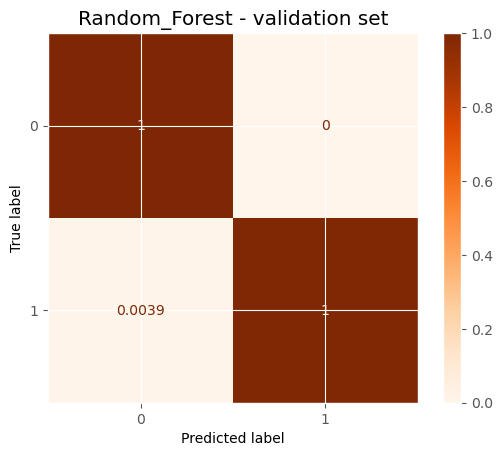

In [129]:
log_cm = confusion_matrix(y_val, y_pred, normalize='true')

# Create a display object for the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Display the confusion matrix
log_disp.plot(cmap='Oranges')
plt.title('Random_Forest - validation set')

In [130]:
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1887
       claim       1.00      1.00      1.00      1533

    accuracy                           1.00      3420
   macro avg       1.00      1.00      1.00      3420
weighted avg       1.00      1.00      1.00      3420



Text(0.5, 1.0, 'Random Forest Feature Importance')

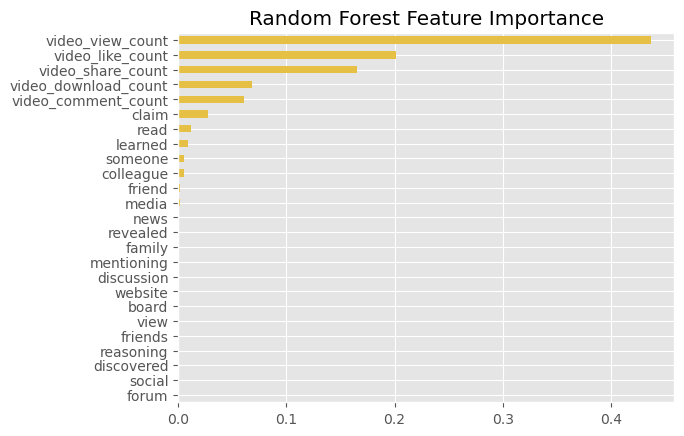

In [126]:
pd.Series(rf_cv.best_estimator_.feature_importances_, index=x.columns).nlargest(25).sort_values().plot(kind='barh',color='#E6BF45') 
plt.title('Random Forest Feature Importance')

#### XGBoost

In [122]:
y_pred = xgb_cv.best_estimator_.predict(x_val)
print(y_pred)

[1 1 1 ... 0 1 0]


Text(0.5, 1.0, 'XGBoost - validation set')

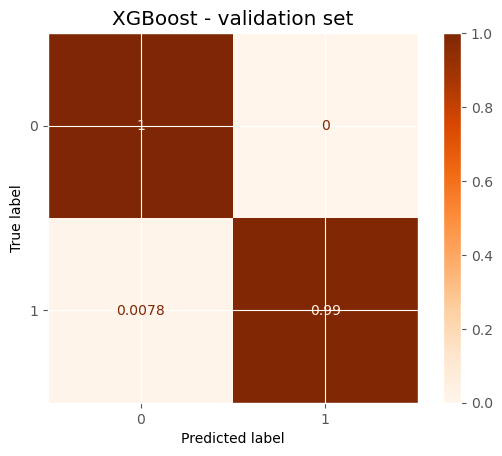

In [123]:
log_cm = confusion_matrix(y_val, y_pred, normalize='true')

# Create a display object for the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Display the confusion matrix
log_disp.plot(cmap='Oranges')
plt.title('XGBoost - validation set')

In [127]:
# Create classification report for XGBoost model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1887
       claim       1.00      0.99      1.00      1533

    accuracy                           1.00      3420
   macro avg       1.00      1.00      1.00      3420
weighted avg       1.00      1.00      1.00      3420



Text(0.5, 1.0, 'XGBoost Feature Importance')

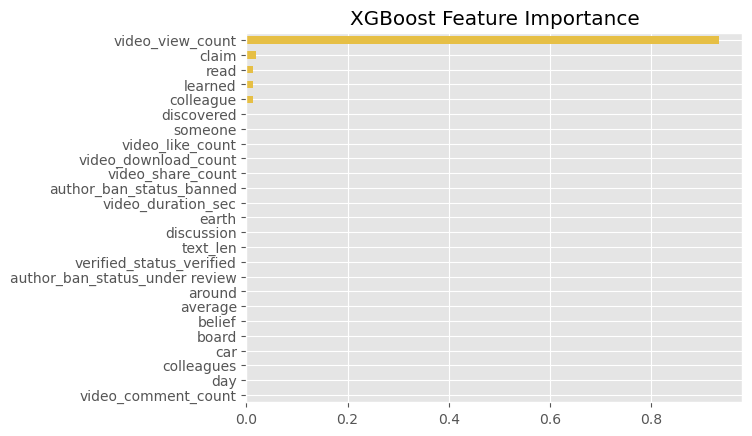

In [125]:
pd.Series(xgb_cv.best_estimator_.feature_importances_, index=x.columns).nlargest(25).sort_values().plot(kind='barh',color='#E6BF45') 
plt.title('XGBoost Feature Importance')

The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

## Predict
* using test set

In [132]:
y_pred_final = rf_cv.best_estimator_.predict(x_te)
print(y_pred_final)

[0 0 0 ... 0 0 0]


Text(0.5, 1.0, 'Final confusion matrix')

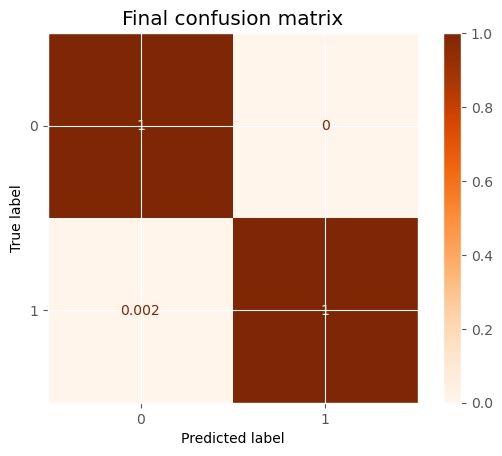

In [133]:
log_cm = confusion_matrix(y_te, y_pred_final, normalize='true')

# Create a display object for the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Display the confusion matrix
log_disp.plot(cmap='Oranges')
plt.title('Final confusion matrix')

In [134]:
target_labels = ['opinion', 'claim']
print(classification_report(y_te, y_pred_final, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1898
       claim       1.00      1.00      1.00      1522

    accuracy                           1.00      3420
   macro avg       1.00      1.00      1.00      3420
weighted avg       1.00      1.00      1.00      3420



1. *Would you recommend using this model? Why or why not?*

Yes, one can recommend this model because it performed well on both the validation and test holdout data. Furthermore, both precision and F<sub>1</sub> scores were consistently high. The model very successfully classified claims and opinions.

2. *What was your model doing? Can you explain how it was making predictions?*

The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.

3. *Are there new features that you can engineer that might improve model performance?*

Because the model currently performs nearly perfectly, there is no need to engineer any new features.

4. *What features would you want to have that would likely improve the performance of your model?*

The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.